## Proyecto: Regresión rendimiento de vehiculos (Presentación avance)
### TEL354 Minería de datos
Integrantes:
- Sergio Ehlen
- Daniel Fernandez

In [19]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os

In [20]:
dfs = []
import os
files = os.listdir("archive")
for f in files:
    try:
        dfi = pd.read_csv("archive/"+f)
    except:
        try:
            dfi = pd.read_csv("archive/"+f,encoding="ISO-8859-1")
        except:
            print("El archivo ",f," no se pudo leer, revisar formato.")
            continue
    dfs.append(dfi)
            
df_all=pd.concat(dfs).reset_index(drop=True)
df_all

El archivo  understanding-the-tables.xlsx  no se pudo leer, revisar formato.


Model year   Make              Model                    Vehicle class  \
0            2023  Acura            Integra                        Full-size   
1            2023  Acura     Integra A-SPEC                        Full-size   
2            2023  Acura     Integra A-SPEC                        Full-size   
3            2023  Acura         MDX SH-AWD     Sport utility vehicle: Small   
4            2023  Acura  MDX SH-AWD Type S  Sport utility vehicle: Standard   
...           ...    ...                ...                              ...   
28730        2024  Volvo      V60 CC B5 AWD             Station wagon: Small   
28731        2024  Volvo      V90 CC B6 AWD          Station wagon: Mid-size   
28732        2024  Volvo        XC40 B5 AWD     Sport utility vehicle: Small   
28733        2024  Volvo        XC60 B5 AWD     Sport utility vehicle: Small   
28734        2024  Volvo        XC90 B6 AWD  Sport utility vehicle: Standard   

       Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                  1.5        4.0          AV7         Z              7.9   
1                  1.5        4.0          AV7         Z              8.1   
2                  1.5        4.0           M6         Z              8.9   
3                  3.5        6.0         AS10         Z             12.6   
4                  3.0        6.0         AS10         Z             13.8   
...                ...        ...          ...       ...              ...   
28730              2.0        4.0          AS8         Z             10.0   
28731              2.0        4.0          AS8         Z             10.7   
28732              2.0        4.0          AS8         Z              9.9   
28733              2.0        4.0          AS8         Z             10.6   
28734              2.0        4.0          AS8         Z             10.9   

       Highway (L/100 km)  ...  Fuel type 2  Range 2 (km)  City (kWh/100 km)  \
0                     6.3  ...          NaN           NaN                NaN   
1                     6.5  ...          NaN           NaN                NaN   
2                     6.5  ...          NaN           NaN                NaN   
3                     9.4  ...          NaN           NaN                NaN   
4                    11.2  ...          NaN           NaN                NaN   
...                   ...  ...          ...           ...                ...   
28730                 7.5  ...          NaN           NaN                NaN   
28731                 8.1  ...          NaN           NaN                NaN   
28732                 7.8  ...          NaN           NaN                NaN   
28733                 8.3  ...          NaN           NaN                NaN   
28734                 8.6  ...          NaN           NaN                NaN   

       Highway (kWh/100 km)  Combined (kWh/100 km)  City (Le/100 km)  \
0                       NaN                    NaN               NaN   
1                       NaN                    NaN               NaN   
2                       NaN                    NaN               NaN   
3                       NaN                    NaN               NaN   
4                       NaN                    NaN               NaN   
...                     ...                    ...               ...   
28730                   NaN                    NaN               NaN   
28731                   NaN                    NaN               NaN   
28732                   NaN                    NaN               NaN   
28733                   NaN                    NaN               NaN   
28734                   NaN                    NaN               NaN   

      Highway (Le/100 km) Combined (Le/100 km)  Range (km)  CO2 rating   
0                     NaN                  NaN         NaN          NaN  
1                     NaN                  NaN         NaN          NaN  
2                     NaN                  NaN         NaN          NaN  

#### De acuerdo con los visto anteriormente, se deben separar los datos de distintos vehiculos (combustibles, híbridos, eléctricos) para poder hacer un análisis útil.

In [21]:
#Analisis vehiculos de combustión
dfs=[]
archivos_gas = ["my1995-2004-fuel-consumption-ratings-5-cycle",
                "my2005-2014-fuel-consumption-ratings-5-cycle",
               "my2015-2019-fuel-consumption-ratings",
               "my2020-fuel-consumption-ratings",
               "my2021-fuel-consumption-ratings",
               "my2022-fuel-consumption-ratings",
               "my2023-fuel-consumption-ratings",
               "my2024-fuel-consumption-ratings"]
for f in archivos_gas:
    dfs.append(pd.read_csv("archive/"+f+".csv",encoding="ISO-8859-1"))
df_gas = pd.concat(dfs).reset_index(drop=True)
df_gas

Model year   Make          Model                    Vehicle class  \
0            1995  Acura        Integra                       Subcompact   
1            1995  Acura        Integra                       Subcompact   
2            1995  Acura   Integra GS-R                       Subcompact   
3            1995  Acura         Legend                          Compact   
4            1995  Acura   Legend Coupe                          Compact   
...           ...    ...            ...                              ...   
27772        2024  Volvo  V60 CC B5 AWD             Station wagon: Small   
27773        2024  Volvo  V90 CC B6 AWD          Station wagon: Mid-size   
27774        2024  Volvo    XC40 B5 AWD     Sport utility vehicle: Small   
27775        2024  Volvo    XC60 B5 AWD     Sport utility vehicle: Small   
27776        2024  Volvo    XC90 B6 AWD  Sport utility vehicle: Standard   

       Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
0                  1.8          4           A4         X             11.6   
1                  1.8          4           M5         X             11.0   
2                  1.8          4           M5         Z             10.8   
3                  3.2          6           A4         Z             14.2   
4                  3.2          6           A4         Z             14.6   
...                ...        ...          ...       ...              ...   
27772              2.0          4          AS8         Z             10.0   
27773              2.0          4          AS8         Z             10.7   
27774              2.0          4          AS8         Z              9.9   
27775              2.0          4          AS8         Z             10.6   
27776              2.0          4          AS8         Z             10.9   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                     8.3                 10.1              28   
1                     8.3                  9.8              29   
2                     8.3                  9.7              29   
3                    10.5                 12.5              23   
4                    11.0                 13.0              22   
...                   ...                  ...             ...   
27772                 7.5                  8.9              32   
27773                 8.1                  9.5              30   
27774                 7.8                  9.0              31   
27775                 8.3                  9.6              29   
27776                 8.6                  9.8              29   

       CO2 emissions (g/km)  CO2 rating  Smog rating  
0                       232         NaN          NaN  
1                       225         NaN          NaN  
2                       223         NaN          NaN  
3                       288         NaN          NaN  
4                       299         NaN          NaN  
...                     ...         ...          ...  
27772                   207         5.0          5.0  
27773                   223         5.0          7.0  
27774                   210         5.0          5.0  
27775                   226         5.0          5.0  
27776                   230         5.0          7.0  

[27777 rows x 15 columns]

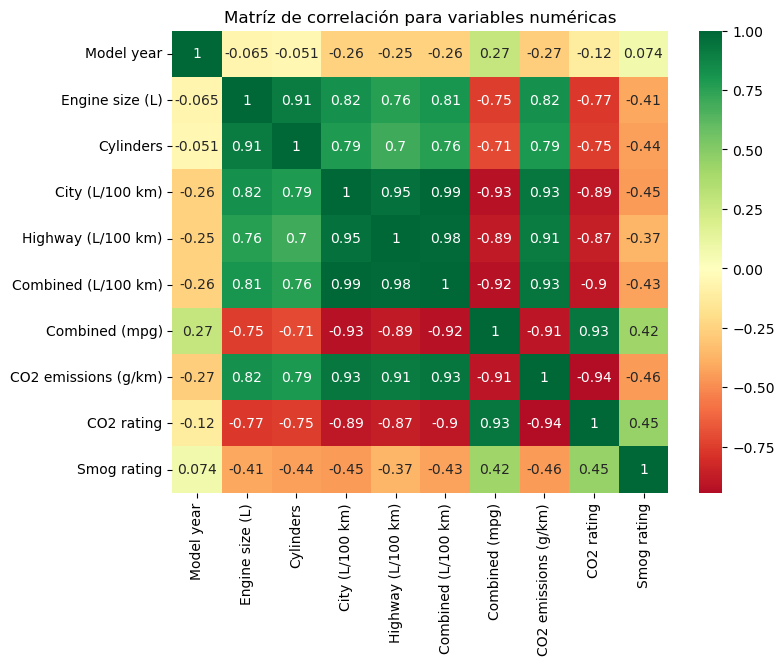

In [22]:
#Variables numericas
plt.figure(figsize=(8,6))
df_gas_n = df_gas.select_dtypes(include='number')
sns.heatmap(df_gas_n.corr(),annot=True,cmap='RdYlGn',center=0)
plt.title("Matríz de correlación para variables numéricas")
plt.show()

#### Se definen para vehiculos de combustión las variables Y a predecir, X numéricas a usar como entrada y variables categóricas.

In [23]:
#Seleccion de variables dependientes e independientes
x_vars = ["Model year","Engine size (L)","Cylinders"]
y_vars = ["City (L/100 km)","Highway (L/100 km)"]
ign_vars = ["CO2 rating","Smog rating","CO2 emissions (g/km)","Combined (mpg)","Combined (L/100 km)"]
cat_vars = ["Make","Model","Vehicle class","Transmission","Fuel type"]

#### Se deciden ignorar variables con demaciados nulos (CO2 rating, Smog rating, CO2 emissions (g/km)) al igual que Combined (mpg) Combined (L/100 km) que son promedios de City y Highway

<Figure size 600x800 with 0 Axes>

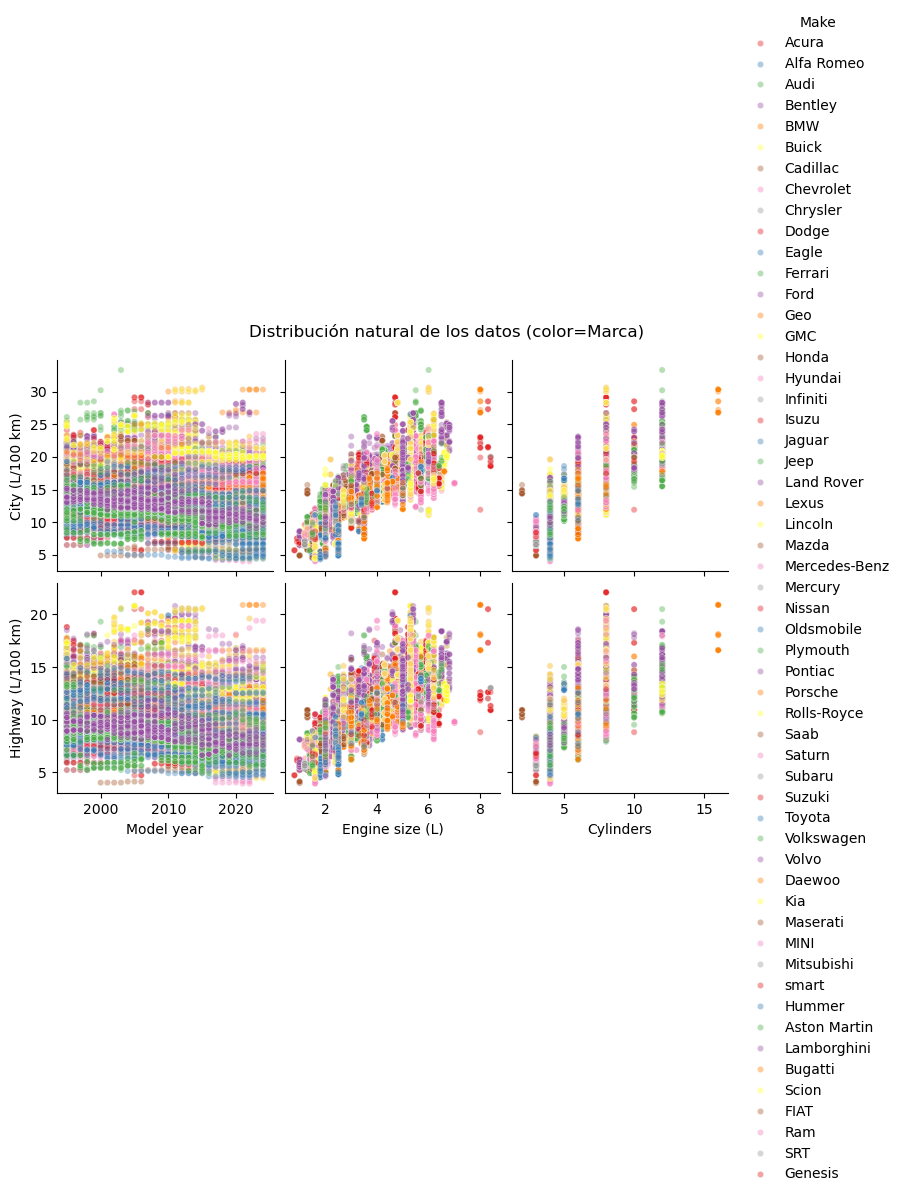

In [24]:
plt.figure(figsize=(6,8))
plot=sns.pairplot(df_gas,x_vars=x_vars,y_vars=y_vars,
             hue="Make",palette='Set1',plot_kws=dict(s=20, alpha=0.4))
plt.suptitle('Distribución natural de los datos (color=Marca)', y=1.05)
plt.show()

#### Dado que se ve una relación lineal aparente en el comportamiento de los datos, se decide primero hacer una regresión con solo las variables numéricas.

In [25]:
#Regresion usando solamente variables numericas
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
start_time = time.time()

X_train, X_test, Y_train, Y_test = train_test_split(df_gas[x_vars], df_gas[y_vars], test_size = 0.3,random_state=1)
krr = KernelRidge(alpha=1,kernel="rbf")
krr.fit(X_train,Y_train)
Y_pred = pd.DataFrame(krr.predict(X_test),columns=y_vars)

print("--- %s seconds ---" % (time.time() - start_time))

for v in y_vars:
    mse = mean_squared_error(Y_test[v],Y_pred[v])
    print("MSE para ",v,": ", mse)
    print("RMSE :",mse**0.5)

--- 49.79932498931885 seconds ---
MSE para  City (L/100 km) :  3.803823925133203
RMSE : 1.950339438439679
MSE para  Highway (L/100 km) :  2.386440844109735
RMSE : 1.544810941218936


In [26]:
X_train_1 = X_train
X_test_1 = X_test
Y_train_1 = Y_train
Y_test_1 = Y_test

<Figure size 600x800 with 0 Axes>

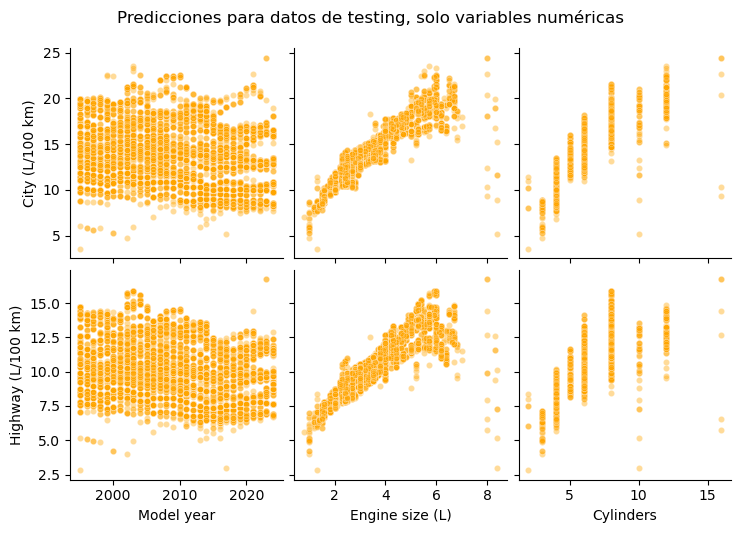

In [27]:
plt.figure(figsize=(6,8))
#plt.title("Predicciones para datos de testing, solo variables numéricas")
plot = sns.pairplot(X_test.reset_index(drop=True).join(Y_pred),x_vars=x_vars,y_vars=y_vars,
             plot_kws=dict(s=20, alpha=0.4,color="orange"))
plt.suptitle('Predicciones para datos de testing, solo variables numéricas', y=1.05)
plt.show()

#### Predicciónes para datos de testeo, parecen comportarse similar a los datos reales, pero presenta menores anomalías.

In [28]:
#Regresion usando variables categorias

from sklearn.preprocessing import OneHotEncoder
    
enc_gas = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
enc_gas.fit(df_gas[cat_vars])

def to_dummies(data,encoder,variables):
    d_num=data.drop(columns=variables)
    d_enc=encoder.transform(data[variables])
    return d_num.reset_index(drop=True).join(pd.DataFrame(d_enc,columns=encoder.get_feature_names_out()))
    
df_gas_d = to_dummies(df_gas,enc_gas,cat_vars)
df_gas_d

Model year  Engine size (L)  Cylinders  City (L/100 km)  \
0            1995              1.8          4             11.6   
1            1995              1.8          4             11.0   
2            1995              1.8          4             10.8   
3            1995              3.2          6             14.2   
4            1995              3.2          6             14.6   
...           ...              ...        ...              ...   
27772        2024              2.0          4             10.0   
27773        2024              2.0          4             10.7   
27774        2024              2.0          4              9.9   
27775        2024              2.0          4             10.6   
27776        2024              2.0          4             10.9   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                     8.3                 10.1              28   
1                     8.3                  9.8              29   
2                     8.3                  9.7              29   
3                    10.5                 12.5              23   
4                    11.0                 13.0              22   
...                   ...                  ...             ...   
27772                 7.5                  8.9              32   
27773                 8.1                  9.5              30   
27774                 7.8                  9.0              31   
27775                 8.3                  9.6              29   
27776                 8.6                  9.8              29   

       CO2 emissions (g/km)  CO2 rating  Smog rating  ...  Transmission_AV8  \
0                       232         NaN          NaN  ...               0.0   
1                       225         NaN          NaN  ...               0.0   
2                       223         NaN          NaN  ...               0.0   
3                       288         NaN          NaN  ...               0.0   
4                       299         NaN          NaN  ...               0.0   
...                     ...         ...          ...  ...               ...   
27772                   207         5.0          5.0  ...               0.0   
27773                   223         5.0          7.0  ...               0.0   
27774                   210         5.0          5.0  ...               0.0   
27775                   226         5.0          5.0  ...               0.0   
27776                   230         5.0          7.0  ...               0.0   

       Transmission_M4  Transmission_M5  Transmission_M6  Transmission_M7  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              1.0              0.0              0.0   
2                  0.0              1.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
27772              0.0              0.0              0.0              0.0   
27773              0.0              0.0              0.0              0.0   
27774              0.0              0.0              0.0              0.0   
27775              0.0              0.0              0.0              0.0   
27776              0.0              0.0              0.0              0.0   

       Fuel type_D  Fuel type_E  Fuel type_N  Fuel type_X  Fuel type_Z  
0              0.0          0.0          0.0          1.0          0.0  
1              0.0          0.0          0.0          1.0          0.0  
2              0.0          0.0          0.0          0.0          1.0  
3              0.0          0.0          0.0          0.0          1.0  
4              0.0          0.0          0.0          0.0          1.0  
...            ...          ...          ...          ...          ...  
27772          0.0          0.0     

In [29]:
df_gas_d

Model year  Engine size (L)  Cylinders  City (L/100 km)  \
0            1995              1.8          4             11.6   
1            1995              1.8          4             11.0   
2            1995              1.8          4             10.8   
3            1995              3.2          6             14.2   
4            1995              3.2          6             14.6   
...           ...              ...        ...              ...   
27772        2024              2.0          4             10.0   
27773        2024              2.0          4             10.7   
27774        2024              2.0          4              9.9   
27775        2024              2.0          4             10.6   
27776        2024              2.0          4             10.9   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                     8.3                 10.1              28   
1                     8.3                  9.8              29   
2                     8.3                  9.7              29   
3                    10.5                 12.5              23   
4                    11.0                 13.0              22   
...                   ...                  ...             ...   
27772                 7.5                  8.9              32   
27773                 8.1                  9.5              30   
27774                 7.8                  9.0              31   
27775                 8.3                  9.6              29   
27776                 8.6                  9.8              29   

       CO2 emissions (g/km)  CO2 rating  Smog rating  ...  Transmission_AV8  \
0                       232         NaN          NaN  ...               0.0   
1                       225         NaN          NaN  ...               0.0   
2                       223         NaN          NaN  ...               0.0   
3                       288         NaN          NaN  ...               0.0   
4                       299         NaN          NaN  ...               0.0   
...                     ...         ...          ...  ...               ...   
27772                   207         5.0          5.0  ...               0.0   
27773                   223         5.0          7.0  ...               0.0   
27774                   210         5.0          5.0  ...               0.0   
27775                   226         5.0          5.0  ...               0.0   
27776                   230         5.0          7.0  ...               0.0   

       Transmission_M4  Transmission_M5  Transmission_M6  Transmission_M7  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              1.0              0.0              0.0   
2                  0.0              1.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
27772              0.0              0.0              0.0              0.0   
27773              0.0              0.0              0.0              0.0   
27774              0.0              0.0              0.0              0.0   
27775              0.0              0.0              0.0              0.0   
27776              0.0              0.0              0.0              0.0   

       Fuel type_D  Fuel type_E  Fuel type_N  Fuel type_X  Fuel type_Z  
0              0.0          0.0          0.0          1.0          0.0  
1              0.0          0.0          0.0          1.0          0.0  
2              0.0          0.0          0.0          0.0          1.0  
3              0.0          0.0          0.0          0.0          1.0  
4              0.0          0.0          0.0          0.0          1.0  
...            ...          ...          ...          ...          ...  
27772          0.0          0.0     

#### La regresión usando variables categóricas toma una cantidad considerable de tiempo

In [30]:
rem = y_vars + ign_vars

start_time = time.time()

X_train, X_test, Y_train, Y_test = train_test_split(df_gas_d.drop(columns=rem), df_gas_d[y_vars], test_size = 0.3,random_state=1)
krr = KernelRidge(alpha=1,kernel="rbf")
krr.fit(X_train,Y_train)
Y_pred = pd.DataFrame(krr.predict(X_test),columns=y_vars)

print("--- %s seconds ---" % (time.time() - start_time))

for v in y_vars:
    mse = mean_squared_error(Y_test[v],Y_pred[v])
    print("MSE para ",v,": ", mse)
    print("RMSE :",mse**0.5)

--- 92.6131546497345 seconds ---
MSE para  City (L/100 km) :  2.819268629564382
RMSE : 1.6790677858753595
MSE para  Highway (L/100 km) :  1.7299712344584774
RMSE : 1.315283708733016


In [31]:
X_train_2 = X_train
X_test_2 = X_test
Y_train_2 = Y_train
Y_test_2 = Y_test

<Figure size 600x800 with 0 Axes>

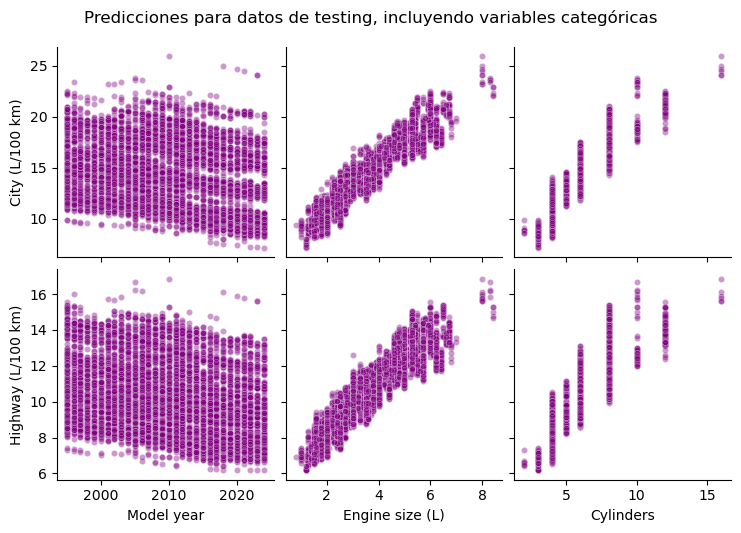

In [32]:
plt.figure(figsize=(6,8))
sns.pairplot(X_test.reset_index(drop=True).join(Y_pred),x_vars=x_vars,y_vars=y_vars,
             plot_kws=dict(s=20, alpha=0.4,color="purple"))
plt.suptitle('Predicciones para datos de testing, incluyendo variables categóricas', y=1.05)
plt.show()

#### Para visualizar la estimación, se elije una muestra de 5 datos de testing


## Demostración: Ejemplo de uso


In [33]:
sample=df_gas.iloc[list(X_test.sample(5,random_state=5).index)]
sample

Model year        Make             Model                 Vehicle class  \
4211         2001         BMW  525i Sport Wagon          Station wagon: Small   
10809        2008         GMC  Yukon XL 4X4 FFV         Sport utility vehicle   
6055         2003       Lexus        RX 300 4X4       Station wagon: Mid-size   
27008        2023  Volkswagen     Atlas 4MOTION  Sport utility vehicle: Small   
12888        2010         GMC        Acadia AWD         Sport utility vehicle   

       Engine size (L)  Cylinders Transmission Fuel type  City (L/100 km)  \
4211               2.5          6           M5         Z             13.9   
10809              5.3          8           A4         E             21.9   
6055               3.0          6           A4         X             14.6   
27008              2.0          4          AS8         X             11.8   
12888              3.6          6           A6         X             14.7   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
4211                  9.5                 11.9              24   
10809                16.1                 19.3              15   
6055                 11.4                 13.2              21   
27008                 9.8                 10.9              26   
12888                10.4                 12.8              22   

       CO2 emissions (g/km)  CO2 rating  Smog rating  
4211                    274         NaN          NaN  
10809                   309         NaN          NaN  
6055                    304         NaN          NaN  
27008                   255         5.0          3.0  
12888                   294         NaN          NaN

In [34]:
x_sample = sample[x_vars+cat_vars].reset_index(drop=True)
y_sample = sample[y_vars].reset_index(drop=True)

x_sample

Model year  Engine size (L)  Cylinders        Make             Model  \
0        2001              2.5          6         BMW  525i Sport Wagon   
1        2008              5.3          8         GMC  Yukon XL 4X4 FFV   
2        2003              3.0          6       Lexus        RX 300 4X4   
3        2023              2.0          4  Volkswagen     Atlas 4MOTION   
4        2010              3.6          6         GMC        Acadia AWD   

                  Vehicle class Transmission Fuel type  
0          Station wagon: Small           M5         Z  
1         Sport utility vehicle           A4         E  
2       Station wagon: Mid-size           A4         X  
3  Sport utility vehicle: Small          AS8         X  
4         Sport utility vehicle           A6         X

In [36]:
def predict_consumption_gas(x):
    d = to_dummies(x,enc_gas,cat_vars)
    y_p = krr.predict(d)
    return pd.DataFrame(y_p,columns=y_vars)

y_predict = predict_consumption_gas(x_sample) 
y_predict

City (L/100 km)  Highway (L/100 km)
0        13.776134            9.724470
1        20.232597           14.626075
2        14.080045           10.322451
3         9.628652            7.694737
4        14.730335           10.834498

In [37]:
dfi=x_sample.join(pd.merge(y_predict, y_sample, how='inner', left_index=True,right_index=True))
dfi.rename(columns={"City (L/100 km)_x":"City (estimado)","Highway (L/100 km)_x":"Highway (estimado)","City (L/100 km)_y":"City (real)","Highway (L/100 km)_y":"Highway (real)"})

Model year  Engine size (L)  Cylinders        Make             Model  \
0        2001              2.5          6         BMW  525i Sport Wagon   
1        2008              5.3          8         GMC  Yukon XL 4X4 FFV   
2        2003              3.0          6       Lexus        RX 300 4X4   
3        2023              2.0          4  Volkswagen     Atlas 4MOTION   
4        2010              3.6          6         GMC        Acadia AWD   

                  Vehicle class Transmission Fuel type  City (estimado)  \
0          Station wagon: Small           M5         Z        13.776134   
1         Sport utility vehicle           A4         E        20.232597   
2       Station wagon: Mid-size           A4         X        14.080045   
3  Sport utility vehicle: Small          AS8         X         9.628652   
4         Sport utility vehicle           A6         X        14.730335   

   Highway (estimado)  City (real)  Highway (real)  
0            9.724470         13.9             9.5  
1           14.626075         21.9            16.1  
2           10.322451         14.6            11.4  
3            7.694737         11.8             9.8  
4           10.834498         14.7            10.4

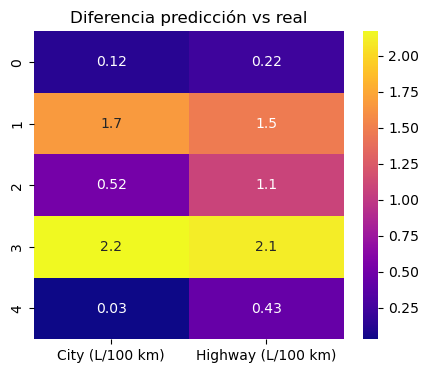

In [38]:
plt.figure(figsize=(5,4))
sns.heatmap(abs(y_predict-y_sample),annot=True,cmap='plasma')#,center=0)
plt.title("Diferencia predicción vs real")
plt.show()

## 
## Vehiculos eléctricos
##

In [39]:
df_ev = pd.read_csv("archive/my2012-2024-battery-electric-vehicles.csv",encoding="ISO-8859-1")
df_ev

Model year        Make               Model                 Vehicle class  \
0          2012  Mitsubishi              i-MiEV                    Subcompact   
1          2012      Nissan                LEAF                      Mid-size   
2          2013        Ford      Focus Electric                       Compact   
3          2013  Mitsubishi              i-MiEV                    Subcompact   
4          2013      Nissan                LEAF                      Mid-size   
..          ...         ...                 ...                           ...   
660        2024  Volkswagen      ID.4 AWD Pro S  Sport utility vehicle: Small   
661        2024       Volvo        C40 Recharge  Sport utility vehicle: Small   
662        2024       Volvo   C40 Recharge Twin  Sport utility vehicle: Small   
663        2024       Volvo       XC40 Recharge  Sport utility vehicle: Small   
664        2024       Volvo  XC40 Recharge Twin  Sport utility vehicle: Small   

     Motor (kW) Transmission Fuel type  City (kWh/100 km)  \
0            49           A1         B               16.9   
1            80           A1         B               19.3   
2           107           A1         B               19.0   
3            49           A1         B               16.9   
4            80           A1         B               19.3   
..          ...          ...       ...                ...   
660         250           A1         B               19.4   
661         185           A1         B               17.8   
662         300           A1         B               19.8   
663         185           A1         B               17.8   
664         300           A1         B               19.8   

     Highway (kWh/100 km)  Combined (kWh/100 km)  City (Le/100 km)  \
0                    21.4                   18.7               1.9   
1                    23.0                   21.1               2.2   
2                    21.1                   20.0               2.1   
3                    21.4                   18.7               1.9   
4                    23.0                   21.1               2.2   
..                    ...                    ...               ...   
660                  21.9                   20.5               2.2   
661                  21.8                   19.6               2.0   
662                  23.0                   21.2               2.2   
663                  22.0                   19.7               2.0   
664                  23.4                   21.4               2.2   

     Highway (Le/100 km)  Combined (Le/100 km)  Range (km)  \
0                    2.4                   2.1         100   
1                    2.6                   2.4         117   
2                    2.4                   2.2         122   
3                    2.4                   2.1         100   
4                    2.6                   2.4         117   
..                   ...                   ...         ...   
660                  2.5                   2.3         423   
661                  2.4                   2.2         478   
662                  2.6                   2.4         414   
663                  2.5                   2.2         472   
664                  2.6                   2.4         409   

     CO2 emissions (g/km)  CO2 rating   Smog rating  Recharge time (h)  
0                       0          NaN          NaN                7.0  
1                       0          NaN          NaN                7.0  
2                       0          NaN          NaN                4.0  
3                       0          NaN          NaN                7.0  
4                       0          NaN          NaN                7.0  
..                    ...          ...          ...                ...  
660                     0         10.0         10.0                8.0  
661                     0         10.0         10.0                8.0  
662                     0         10.0         10.0     

In [40]:
df_ev["Transmission"].unique()

array(['A1', 'A2'], dtype=object)

In [41]:
df_ev.isnull().sum()

Model year                0
Make                      0
Model                     0
Vehicle class             0
Motor (kW)                0
Transmission              0
Fuel type                 0
City (kWh/100 km)         0
Highway (kWh/100 km)      0
Combined (kWh/100 km)     0
City (Le/100 km)          0
Highway (Le/100 km)       0
Combined (Le/100 km)      0
Range (km)                0
CO2 emissions (g/km)      0
CO2 rating               34
Smog rating              61
Recharge time (h)         0
dtype: int64

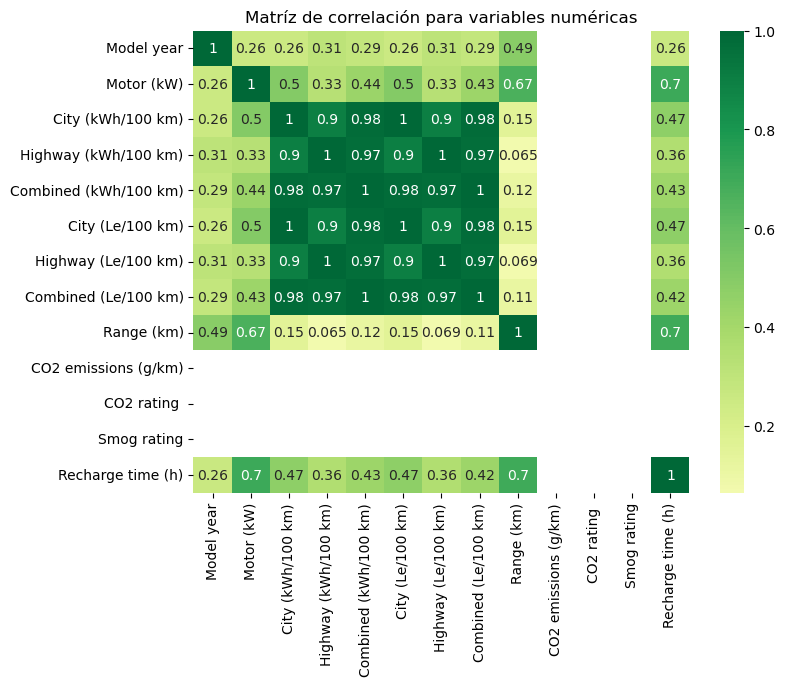

In [42]:
plt.figure(figsize=(8,6))
df_ev_n = df_ev.select_dtypes(include='number')
sns.heatmap(df_ev_n.corr(),annot=True,cmap='RdYlGn',center=0)
plt.title("Matríz de correlación para variables numéricas")
plt.show()

#### Las columnas de CO2 rating, CO2 emissions y Smog continenen principalmente datos nulos y son irrelevantes para el contexto de vehiculos eléctricos, por lo que serán ignoradas

In [43]:
df_ev.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Transmission', 'Fuel type', 'City (kWh/100 km)',
       'Highway (kWh/100 km)', 'Combined (kWh/100 km)', 'City (Le/100 km)',
       'Highway (Le/100 km)', 'Combined (Le/100 km)', 'Range (km)',
       'CO2 emissions (g/km)', 'CO2 rating ', 'Smog rating',
       'Recharge time (h)'],
      dtype='object')

In [66]:
x_vars = ["Model year","Motor (kW)"]
y_vars = ["City (kWh/100 km)","Highway (kWh/100 km)",'Range (km)','Recharge time (h)']
ign_vars = ["CO2 rating ","Smog rating","CO2 emissions (g/km)","Combined (kWh/100 km)",'City (Le/100 km)',
       'Highway (Le/100 km)', 'Combined (Le/100 km)',"Fuel type"]
cat_vars = ["Make","Model","Vehicle class","Transmission"]

<Figure size 600x800 with 0 Axes>

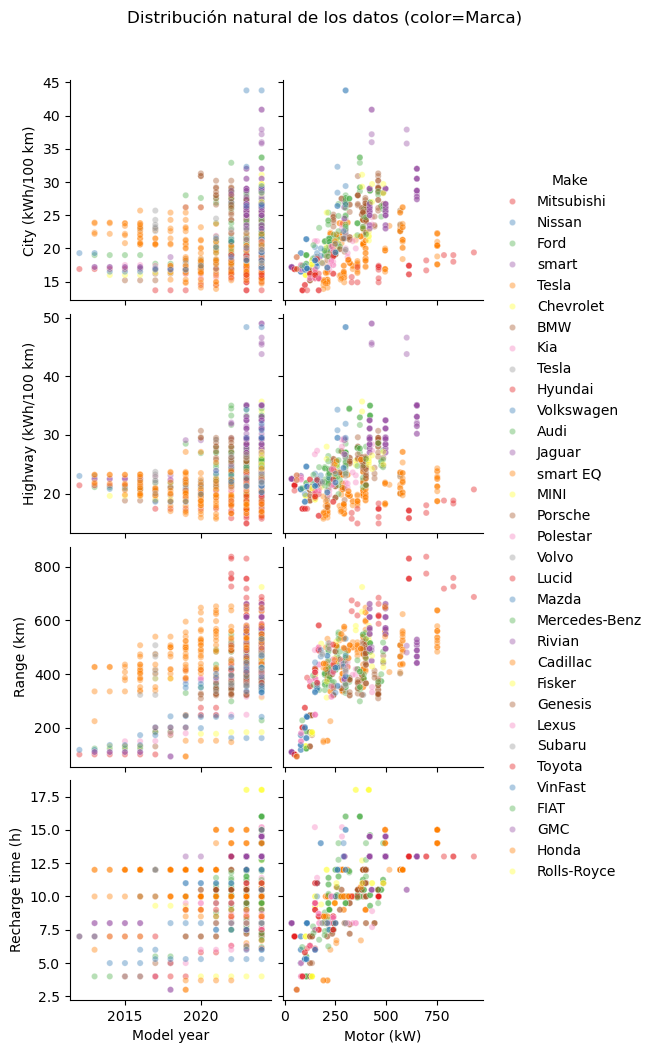

In [67]:
plt.figure(figsize=(6,8))
plot=sns.pairplot(df_ev,x_vars=x_vars,y_vars=y_vars,
             hue="Make",palette='Set1',plot_kws=dict(s=20, alpha=0.4))
plt.suptitle('Distribución natural de los datos (color=Marca)', y=1.05)
plt.show()

In [68]:
df_ev

Model year        Make               Model                 Vehicle class  \
0          2012  Mitsubishi              i-MiEV                    Subcompact   
1          2012      Nissan                LEAF                      Mid-size   
2          2013        Ford      Focus Electric                       Compact   
3          2013  Mitsubishi              i-MiEV                    Subcompact   
4          2013      Nissan                LEAF                      Mid-size   
..          ...         ...                 ...                           ...   
660        2024  Volkswagen      ID.4 AWD Pro S  Sport utility vehicle: Small   
661        2024       Volvo        C40 Recharge  Sport utility vehicle: Small   
662        2024       Volvo   C40 Recharge Twin  Sport utility vehicle: Small   
663        2024       Volvo       XC40 Recharge  Sport utility vehicle: Small   
664        2024       Volvo  XC40 Recharge Twin  Sport utility vehicle: Small   

     Motor (kW) Transmission Fuel type  City (kWh/100 km)  \
0            49           A1         B               16.9   
1            80           A1         B               19.3   
2           107           A1         B               19.0   
3            49           A1         B               16.9   
4            80           A1         B               19.3   
..          ...          ...       ...                ...   
660         250           A1         B               19.4   
661         185           A1         B               17.8   
662         300           A1         B               19.8   
663         185           A1         B               17.8   
664         300           A1         B               19.8   

     Highway (kWh/100 km)  Combined (kWh/100 km)  City (Le/100 km)  \
0                    21.4                   18.7               1.9   
1                    23.0                   21.1               2.2   
2                    21.1                   20.0               2.1   
3                    21.4                   18.7               1.9   
4                    23.0                   21.1               2.2   
..                    ...                    ...               ...   
660                  21.9                   20.5               2.2   
661                  21.8                   19.6               2.0   
662                  23.0                   21.2               2.2   
663                  22.0                   19.7               2.0   
664                  23.4                   21.4               2.2   

     Highway (Le/100 km)  Combined (Le/100 km)  Range (km)  \
0                    2.4                   2.1         100   
1                    2.6                   2.4         117   
2                    2.4                   2.2         122   
3                    2.4                   2.1         100   
4                    2.6                   2.4         117   
..                   ...                   ...         ...   
660                  2.5                   2.3         423   
661                  2.4                   2.2         478   
662                  2.6                   2.4         414   
663                  2.5                   2.2         472   
664                  2.6                   2.4         409   

     CO2 emissions (g/km)  CO2 rating   Smog rating  Recharge time (h)  
0                       0          NaN          NaN                7.0  
1                       0          NaN          NaN                7.0  
2                       0          NaN          NaN                4.0  
3                       0          NaN          NaN                7.0  
4                       0          NaN          NaN                7.0  
..                    ...          ...          ...                ...  
660                     0         10.0         10.0                8.0  
661                     0         10.0         10.0                8.0  
662                     0         10.0         10.0     

In [69]:
start_time = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(df_ev[x_vars], df_ev[y_vars], test_size = 0.3,random_state=1)
krr = KernelRidge(alpha=1,kernel="rbf")
krr.fit(X_train,Y_train)
Y_pred = pd.DataFrame(krr.predict(X_test),columns=y_vars)

print("--- %s seconds ---" % (time.time() - start_time))

for v in y_vars:
    mse = mean_squared_error(Y_test[v],Y_pred[v])
    print("MSE para ",v,": ", mse)
    print("RMSE :",mse**0.5)

--- 0.034241437911987305 seconds ---
MSE para  City (kWh/100 km) :  85.14849368644367
RMSE : 9.227594144003282
MSE para  Highway (kWh/100 km) :  112.67734361193003
RMSE : 10.614958483759136
MSE para  Range (km) :  33818.086827971776
RMSE : 183.8969462170913
MSE para  Recharge time (h) :  17.017678914655892
RMSE : 4.125248951839864


In [70]:
df_ev[y_vars].describe()

City (kWh/100 km)  Highway (kWh/100 km)  Range (km)  Recharge time (h)
count         665.000000            665.000000  665.000000         665.000000
mean           21.569023             23.671729  423.972932          10.149248
std             4.827457              5.023905  132.832667           2.773825
min            13.700000             14.900000   92.000000           3.000000
25%            17.400000             20.500000  363.000000           8.000000
50%            21.000000             22.500000  426.000000          10.000000
75%            25.000000             26.000000  502.000000          12.000000
max            43.800000             49.000000  837.000000          18.000000

In [71]:
X_train_3 = X_train
X_test_3 = X_test
Y_train_3 = Y_train
Y_test_3 = Y_test

In [72]:
# Entrenamiento utilizando variables categóricas    
enc_ev = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
enc_ev.fit(df_ev[cat_vars])
df_ev_d = to_dummies(df_ev,enc_ev,cat_vars)
df_ev_d

rem = y_vars + ign_vars

start_time = time.time()

X_train, X_test, Y_train, Y_test = train_test_split(df_ev_d.drop(columns=rem), df_ev_d[y_vars], test_size = 0.3,random_state=1)
krr = KernelRidge(alpha=1,kernel="rbf")
krr.fit(X_train,Y_train)
Y_pred = pd.DataFrame(krr.predict(X_test),columns=y_vars)

print("--- %s seconds ---" % (time.time() - start_time))

for v in y_vars:
    mse = mean_squared_error(Y_test[v],Y_pred[v])
    print("MSE para ",v,": ", mse)
    print("RMSE :",mse**0.5)

--- 0.057430267333984375 seconds ---
MSE para  City (kWh/100 km) :  13.728823335779143
RMSE : 3.7052426824405367
MSE para  Highway (kWh/100 km) :  16.624391196931935
RMSE : 4.077301950669331
MSE para  Range (km) :  5052.535304440691
RMSE : 71.08118811922526
MSE para  Recharge time (h) :  2.6693941722076873
RMSE : 1.6338280730259496


In [75]:
X_train_4 = X_train
X_test_4 = X_test
Y_train_4 = Y_train
Y_test_4 = Y_test

<Figure size 600x800 with 0 Axes>

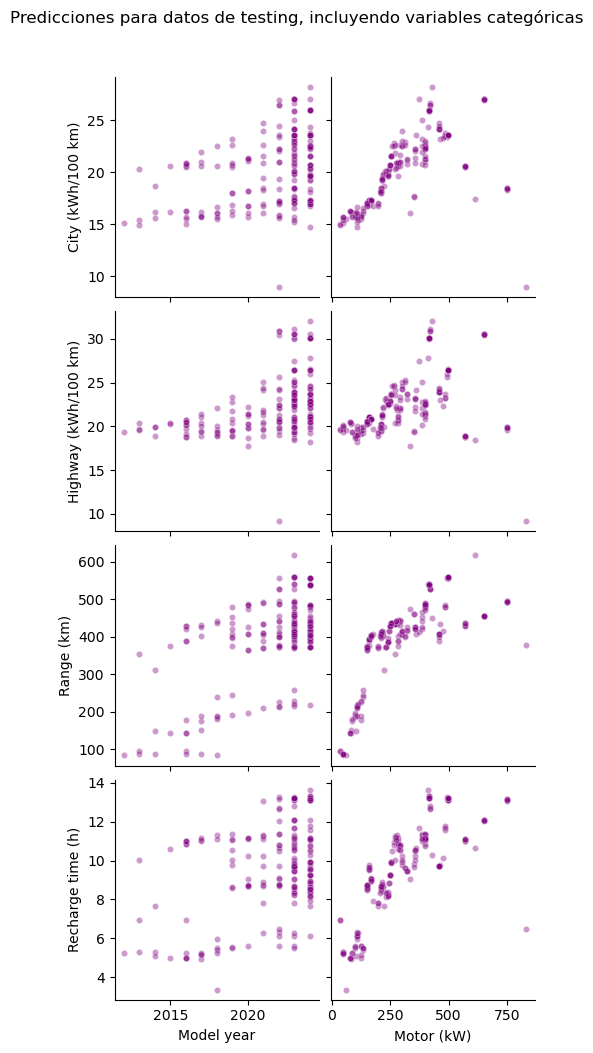

In [76]:
plt.figure(figsize=(6,8))
sns.pairplot(X_test.reset_index(drop=True).join(Y_pred),x_vars=x_vars,y_vars=y_vars,
             plot_kws=dict(s=20, alpha=0.4,color="purple"))
plt.suptitle('Predicciones para datos de testing, incluyendo variables categóricas', y=1.05)
plt.show()

#
# Híbridos
#

In [78]:
df_hb = pd.read_csv("archive/my2012-2024-plug-in-hybrid-electric-vehicles.csv",encoding="ISO-8859-1")
df_hb

Model year       Make                 Model  \
0          2012  Chevrolet                  Volt   
1          2013  Chevrolet                  Volt   
2          2013       Ford          C-MAX Energi   
3          2013       Ford         Fusion Energi   
4          2013     Toyota  Prius Plug-in Hybrid   
..          ...        ...                   ...   
288        2024      Volvo   S60 T8 AWD Recharge   
289        2024      Volvo   S90 T8 AWD Recharge   
290        2024      Volvo   V60 T8 AWD Recharge   
291        2024      Volvo  XC60 T8 AWD Recharge   
292        2024      Volvo  XC90 T8 AWD Recharge   

                       Vehicle class  Motor (kW)  Engine size (L)  Cylinders  \
0                            Compact         111              1.4          4   
1                            Compact         111              1.4          4   
2                           Mid-size          35              2.0          4   
3                           Mid-size          35              2.0          4   
4                           Mid-size          60              1.8          4   
..                               ...         ...              ...        ...   
288                          Compact         107              2.0          4   
289                         Mid-size         107              2.0          4   
290             Station wagon: Small         107              2.0          4   
291     Sport utility vehicle: Small         107              2.0          4   
292  Sport utility vehicle: Standard         107              2.0          4   

    Transmission Fuel type 1               Combined Le/100 km  Range 1 (km)  \
0             AV           B            2.5 (22.3 kWh/100 km)            56   
1             AV           B            2.4 (21.4 kWh/100 km)            61   
2             AV         B/X  2.7 ([23.2 kWh + 0.1 L]/100 km)            32   
3             AV         B/X  2.7 ([23.2 kWh + 0.1 L]/100 km)            32   
4             AV         B/X  2.5 ([18.0 kWh + 0.4 L]/100 km)            18   
..           ...         ...                              ...           ...   
288          AS8        B/Z*  3.0 ([27.2 kWh + 0.0 L]/100 km)            64   
289          AS8        B/Z*  3.4 ([30.0 kWh + 0.0 L]/100 km)            61   
290          AS8        B/Z*  3.0 ([27.2 kWh + 0.0 L]/100 km)            64   
291          AS8        B/Z*  3.5 ([31.2 kWh + 0.0 L]/100 km)            58   
292          AS8        B/Z*  3.8 ([34.4 kWh + 0.0 L]/100 km)            53   

     Recharge time (h) Fuel type 2  City (L/100 km)  Highway (L/100 km)  \
0                  4.0           Z              6.7                 5.9   
1                  4.0           Z              6.7                 5.9   
2                  2.5           X              5.8                 6.5   
3                  2.5           X              5.8                 6.5   
4                  1.5           X              4.7                 4.8   
..                 ...         ...              ...                 ...   
288                5.0           Z              8.0                 7.2   
289                5.0           Z              8.5                 7.6   
290                5.0           Z              8.0                 7.2   
291                5.0           Z              8.5                 8.5   
292                5.0           Z              9.1                 8.6   

     Combined (L/100 km)  Range 2 (km)  CO2 emissions (g/km)  CO2 rating  \
0                    6.4           550                    54         NaN   
1                    6.4           550                    45         NaN   
2                    6.1           856                    80         NaN   
3                    6.1           856                    80         NaN   
4                    4.7           845                   101         NaN   
..                   ...           ...                   ...         ...   
288                  7.6           79

In [79]:
df_hb.isnull().sum()

Model year               0
Make                     0
Model                    0
Vehicle class            0
Motor (kW)               0
Engine size (L)          0
Cylinders                0
Transmission             0
Fuel type 1              0
Combined Le/100 km       0
Range 1 (km)             0
Recharge time (h)        0
Fuel type 2              0
City (L/100 km)          0
Highway (L/100 km)       0
Combined (L/100 km)      0
Range 2 (km)             0
CO2 emissions (g/km)     0
CO2 rating              20
Smog rating             36
dtype: int64

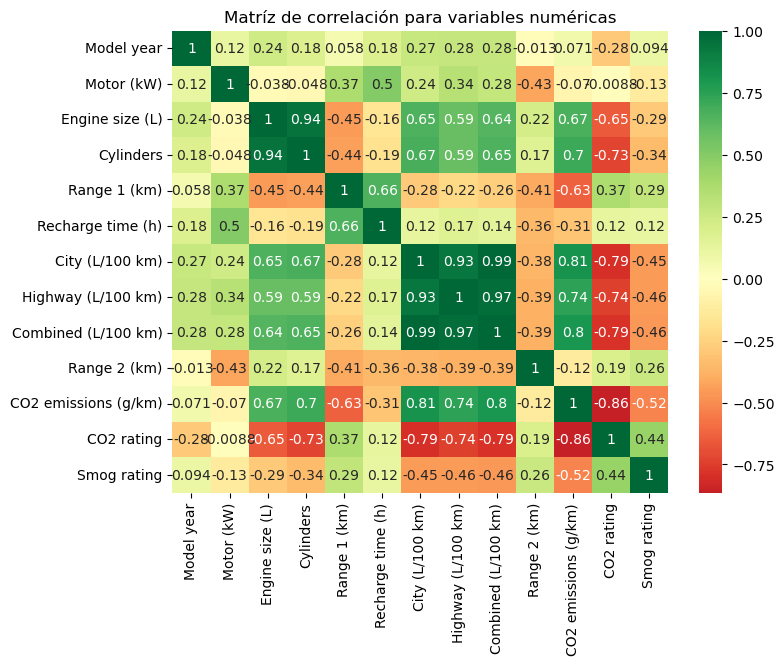

In [80]:
plt.figure(figsize=(8,6))
df_hb_n = df_hb.select_dtypes(include='number')
sns.heatmap(df_hb_n.corr(),annot=True,cmap='RdYlGn',center=0)
plt.title("Matríz de correlación para variables numéricas")
plt.show()

In [81]:
df_hb.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Motor (kW)',
       'Engine size (L)', 'Cylinders', 'Transmission', 'Fuel type 1',
       'Combined Le/100 km', 'Range 1 (km)', 'Recharge time (h)',
       'Fuel type 2', 'City (L/100 km)', 'Highway (L/100 km)',
       'Combined (L/100 km)', 'Range 2 (km)', 'CO2 emissions (g/km)',
       'CO2 rating', 'Smog rating'],
      dtype='object')

In [82]:
x_vars = ["Model year","Motor (kW)","Engine size (L)","Cylinders"]
y_vars = ["City (L/100 km)","Highway (L/100 km)",'Range 1 (km)','Range 2 (km)','Recharge time (h)']
ign_vars = ["Combined Le/100 km","Combined (L/100 km)","CO2 emissions (g/km)","CO2 rating","Smog rating"]
cat_vars = ["Make","Model","Vehicle class","Transmission","Fuel type 1","Fuel type 2"]

<Figure size 600x800 with 0 Axes>

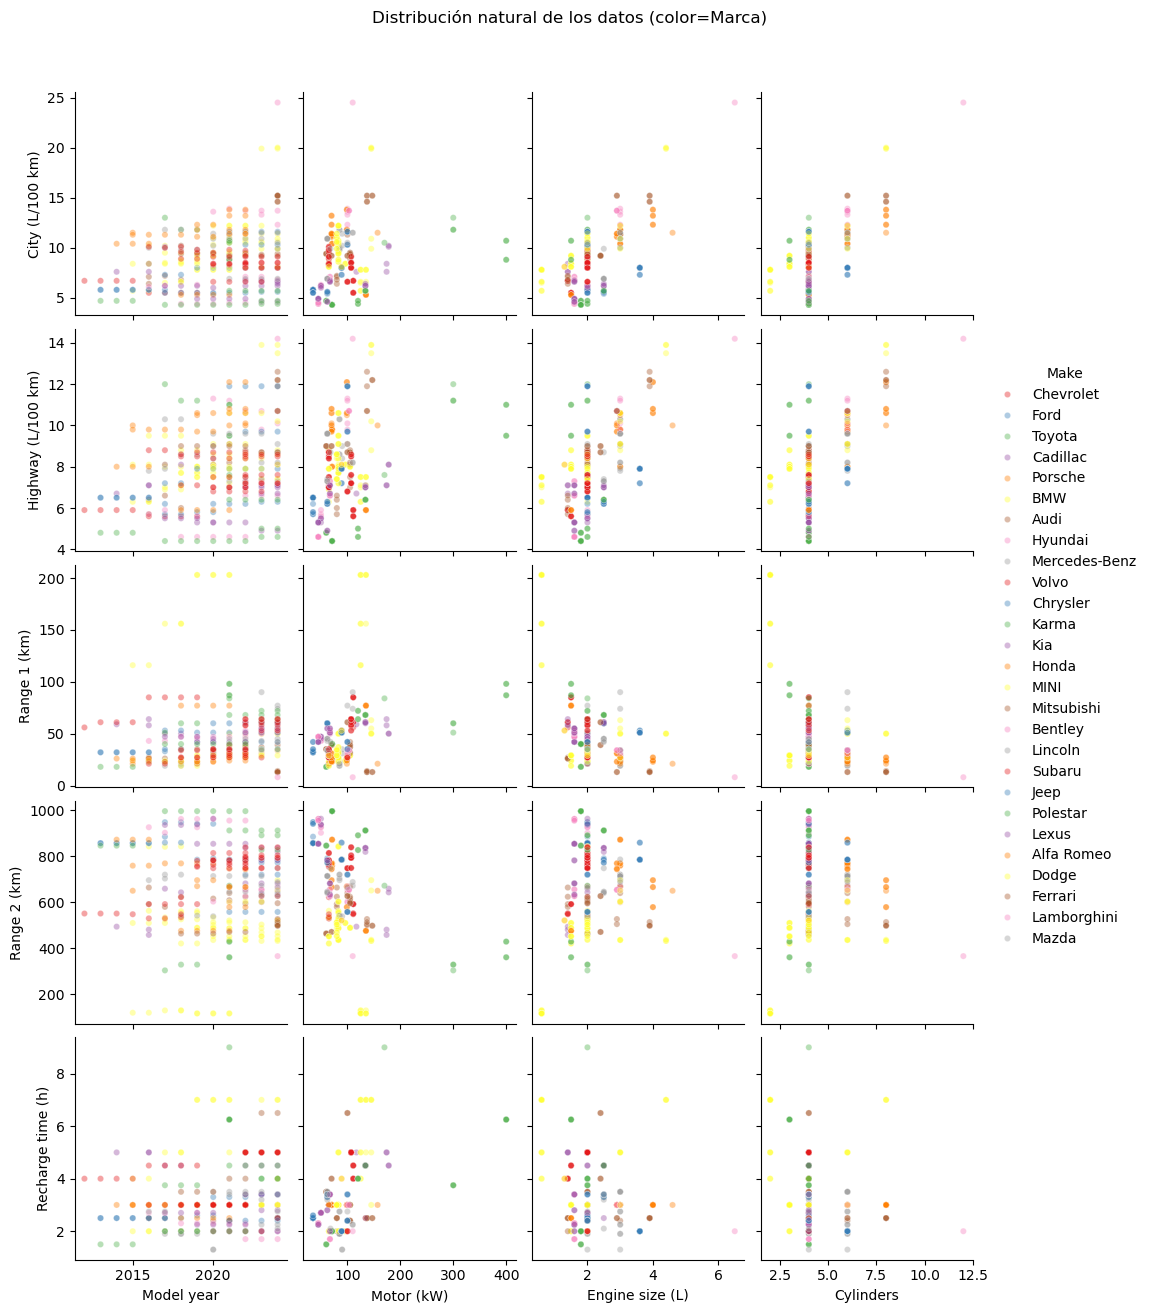

In [83]:
plt.figure(figsize=(6,8))
plot=sns.pairplot(df_hb,x_vars=x_vars,y_vars=y_vars,
             hue="Make",palette='Set1',plot_kws=dict(s=20, alpha=0.4))
plt.suptitle('Distribución natural de los datos (color=Marca)', y=1.05)
plt.show()

In [85]:
enc_hb = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
enc_hb.fit(df_hb[cat_vars])
df_hb_d = to_dummies(df_hb,enc_hb,cat_vars)
df_hb_d

rem = y_vars + ign_vars

start_time = time.time()

X_train, X_test, Y_train, Y_test = train_test_split(df_hb_d.drop(columns=rem), df_hb_d[y_vars], test_size = 0.3,random_state=1)
krr = KernelRidge(alpha=1,kernel="rbf")
krr.fit(X_train,Y_train)
Y_pred = pd.DataFrame(krr.predict(X_test),columns=y_vars)

print("--- %s seconds ---" % (time.time() - start_time))

for v in y_vars:
    mse = mean_squared_error(Y_test[v],Y_pred[v])
    print("MSE para ",v,": ", mse)
    print("RMSE :",mse**0.5)

--- 0.023656606674194336 seconds ---
MSE para  City (L/100 km) :  5.699449841327802
RMSE : 2.38735205642733
MSE para  Highway (L/100 km) :  2.215219591503908
RMSE : 1.4883613779939024
MSE para  Range 1 (km) :  397.53036227129866
RMSE : 19.938163462849296
MSE para  Range 2 (km) :  19123.81458115584
RMSE : 138.2888809021023
MSE para  Recharge time (h) :  0.5889913401958726
RMSE : 0.7674577123176707


In [86]:
X_train_5 = X_train
X_test_5 = X_test
Y_train_5 = Y_train
Y_test_5 = Y_test

<Figure size 600x800 with 0 Axes>

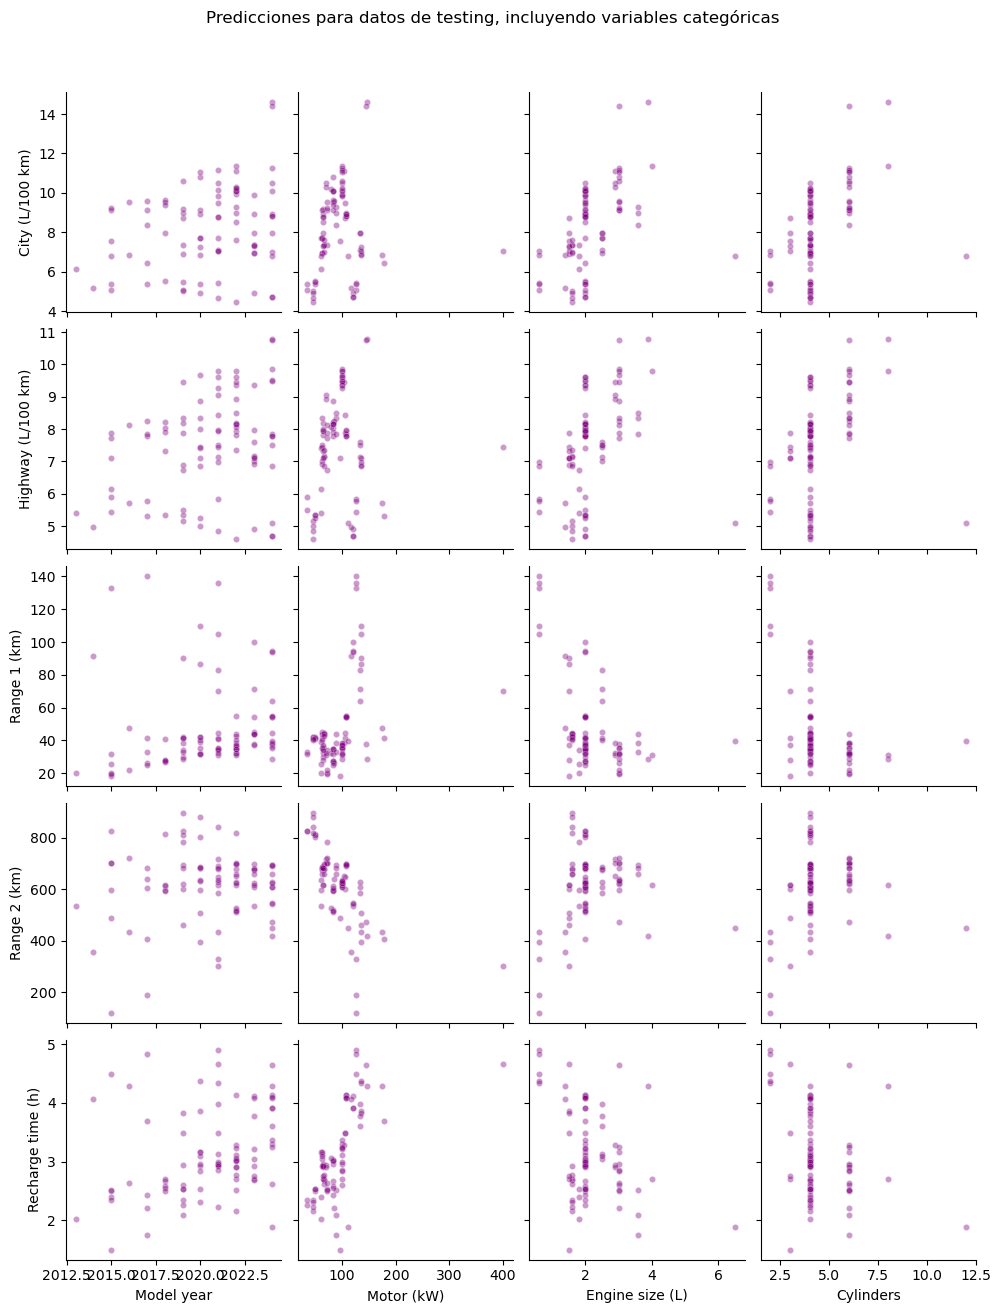

In [87]:
plt.figure(figsize=(6,8))
sns.pairplot(X_test.reset_index(drop=True).join(Y_pred),x_vars=x_vars,y_vars=y_vars,
             plot_kws=dict(s=20, alpha=0.4,color="purple"))
plt.suptitle('Predicciones para datos de testing, incluyendo variables categóricas', y=1.05)
plt.show()